In [ ]:
!pip install ace_tools

Episode-wise Analysis:
         Reward  Avg_Embedding_Distance  Number_of_Guesses
Episode                                                   
1          -6.0               -1.000000                  0
2           0.0               -1.000000                  0
3           1.0                1.290567                  1
4          -8.0                1.275045                  1
5           6.0                1.280664                  1
6           0.0               -1.000000                  0
7         -12.0                1.244702                  1
8           0.0               -1.000000                  0
9          -6.0               -1.000000                  0
10          0.0               -1.000000                  0
11         -4.0                1.275703                  1
12          0.0               -1.000000                  0
13          6.0                1.246826                  1
14          0.0               -1.000000                  0
15          0.0               -1.

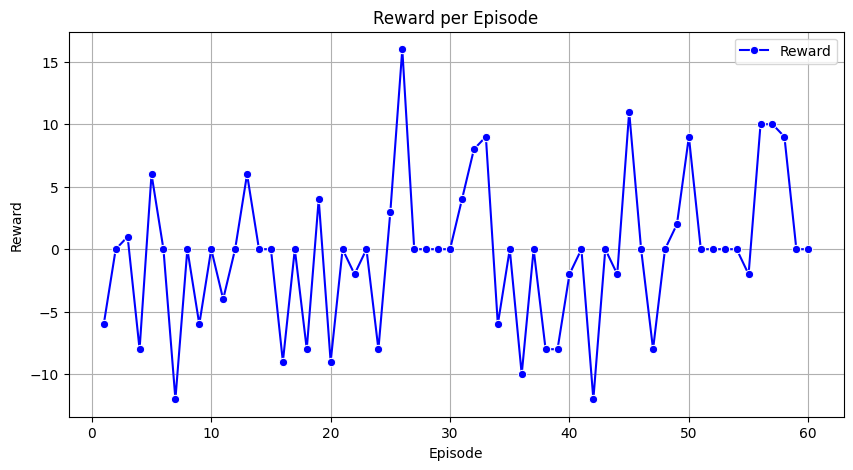

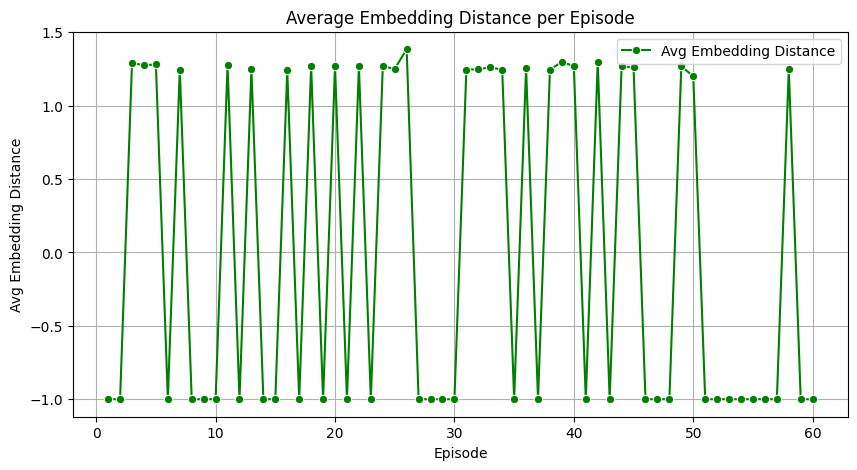

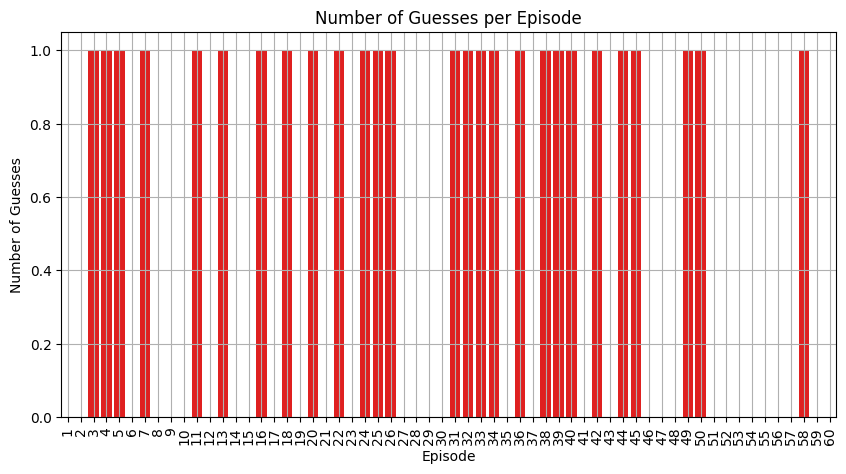

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "/content/training_results (7).csv"
df = pd.read_csv(file_path)

# Group data by Episode and calculate mean values for Reward, Avg_Embedding_Distance, and count of Guesses per episode
reward_per_episode = df.groupby("Episode")["Reward"].mean()
embedding_distance_per_episode = df.groupby("Episode")["Avg_Embedding_Distance"].mean()
guesses_per_episode = df.groupby("Episode")["Guesses"].count()  # Count non-null values

# Create a combined DataFrame for better visualization
episode_analysis = pd.DataFrame({
    "Reward": reward_per_episode,
    "Avg_Embedding_Distance": embedding_distance_per_episode,
    "Number_of_Guesses": guesses_per_episode
})

# Print the table
print("Episode-wise Analysis:")
print(episode_analysis)

# Define custom colors for each plot
reward_color = "blue"
embedding_distance_color = "green"
guesses_color = "red"

# Plot Reward per Episode with custom color
plt.figure(figsize=(10, 5))
sns.lineplot(data=episode_analysis, x=episode_analysis.index, y="Reward", label="Reward", marker="o", color=reward_color)
plt.title("Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

# Plot Avg Embedding Distance per Episode with custom color
plt.figure(figsize=(10, 5))
sns.lineplot(data=episode_analysis, x=episode_analysis.index, y="Avg_Embedding_Distance", label="Avg Embedding Distance", marker="o", color=embedding_distance_color)
plt.title("Average Embedding Distance per Episode")
plt.xlabel("Episode")
plt.ylabel("Avg Embedding Distance")
plt.grid(True)
plt.show()

# Plot Number of Guesses per Episode with custom color
plt.figure(figsize=(10, 5))
sns.barplot(x=episode_analysis.index, y="Number_of_Guesses", data=episode_analysis, color=guesses_color)
plt.title("Number of Guesses per Episode")
plt.xlabel("Episode")
plt.ylabel("Number of Guesses")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Embedding Distance Comparison (With vs. Without Guesses):
         Avg_Embedding_Distance (With Guesses)  \
Episode                                          
1                                     0.000000   
2                                     0.000000   
3                                     1.290567   
4                                     1.275045   
5                                     1.280664   
6                                     0.000000   
7                                     1.244702   
8                                     0.000000   
9                                     0.000000   
10                                    0.000000   
11                                    1.275703   
12                                    0.000000   
13                                    1.246826   
14                                    0.000000   
15                                    0.000000   
16                                    1.239426   
17                                    0.00

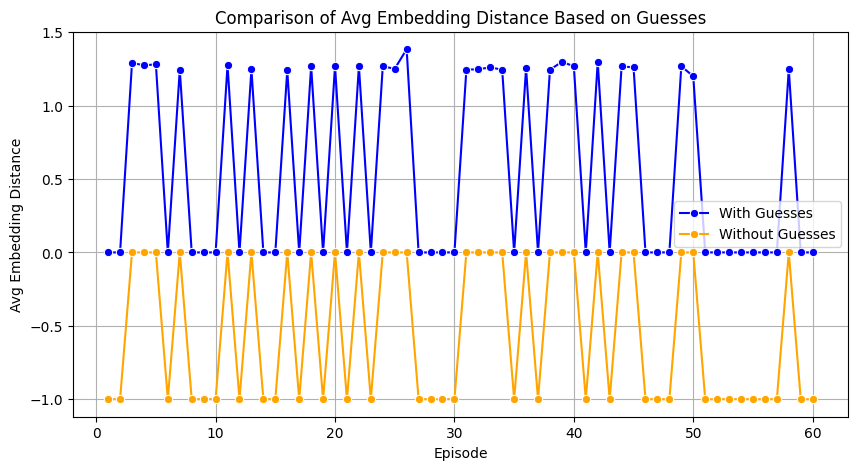

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "/content/training_results (7).csv"
df = pd.read_csv(file_path)

# Convert 'Guesses' column to a boolean flag (1 if a guess exists, 0 if missing)
df["Has_Guess"] = df["Guesses"].notnull().astype(int)

# Compute mean embedding distance for episodes where guesses were made
embedding_distance_with_guesses = df[df["Has_Guess"] == 1].groupby("Episode")["Avg_Embedding_Distance"].mean()
embedding_distance_without_guesses = df[df["Has_Guess"] == 0].groupby("Episode")["Avg_Embedding_Distance"].mean()

# Create a combined DataFrame for better visualization
guess_analysis = pd.DataFrame({
    "Avg_Embedding_Distance (With Guesses)": embedding_distance_with_guesses,
    "Avg_Embedding_Distance (Without Guesses)": embedding_distance_without_guesses
}).fillna(0)  # Fill NaN values with 0

# Print the table
print("Embedding Distance Comparison (With vs. Without Guesses):")
print(guess_analysis)

# Plot comparison of embedding distances with and without guesses
plt.figure(figsize=(10, 5))
sns.lineplot(data=guess_analysis, x=guess_analysis.index, y="Avg_Embedding_Distance (With Guesses)", label="With Guesses", marker="o", color="blue")
sns.lineplot(data=guess_analysis, x=guess_analysis.index, y="Avg_Embedding_Distance (Without Guesses)", label="Without Guesses", marker="o", color="orange")
plt.title("Comparison of Avg Embedding Distance Based on Guesses")
plt.xlabel("Episode")
plt.ylabel("Avg Embedding Distance")
plt.legend()
plt.grid(True)
plt.show()
